# Training Model

In [1]:
from src.dataset_utils import Dataset
from src.model import OCRModel

In [3]:
i=1
data = Dataset()
data.build()
ocr_model = OCRModel(kfold_split=i)
ocr_model.train(data.train_dataset, data.val_dataset)
loss, acc = ocr_model.eval_model(data.val_dataset)
ocr_model.visualize_history()

[INFO] load mnist data took 0.23008990287780762 second
[INFO] load az data took 30.050831079483032 second
[INFO] combining dataset took 38.44195580482483 seconds
[INFO] building dataset tooks 43.35316848754883 seconds
[INFO] initializing model took 0.4569885730743408 seconds
Epoch 1/1000
2764/2766 [============================>.] - ETA: 0s - loss: nan - categorical_accuracy: 0.0156
Epoch 1: val_categorical_accuracy improved from -inf to 0.01561, saving model to models/mobilenet_with_augment_1\cp.ckpt
2766/2766 [==============================] - 72s 25ms/step - loss: nan - categorical_accuracy: 0.0156 - val_loss: nan - val_categorical_accuracy: 0.0156
Epoch 2/1000
2483/2766 [=========================>....] - ETA: 6s - loss: nan - categorical_accuracy: 0.0157

# Model Inference

In [81]:
from src.dataset_utils import load_az_dataset, combining_dataset, load_mnist_dataset
import matplotlib.pyplot as plt
import numpy as np
import random

In [56]:
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

In [44]:
data = Dataset()
data.build()

[INFO] building dataset tooks 48.55380630493164 seconds


In [39]:
ocr_model_path = 'models/mobilenet_3/cp.ckpt'
model = OCRModel(3)
model.load(model_type='mobilenet', model_path=ocr_model_path)

[INFO] initializing model took 3.963696241378784 seconds
[INFO] loading the model took 4.404262065887451 seconds


In [74]:
for img, label in data.train_dataset.take(1):
    print(img, label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [76]:
preds = model.model.predict(img)

4/4 [==============================] - 8s 8ms/step


In [78]:
preds.shape

(128, 36)

label:  U
predicted:  U


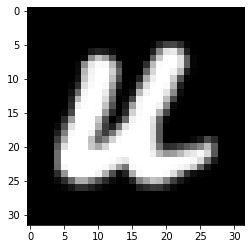

In [98]:
test_idx = random.randint(0, img.shape[0])
label_idx = np.argmax(label[test_idx])
preds_idx = np.argmax(preds[test_idx])
print('label: ', labelNames[label_idx])
print('predicted: ', labelNames[preds_idx])
plt.imshow(img[test_idx])

In [72]:
np.max(img[0][:,:,0])

1.0

In [3]:
data, label = load_az_dataset('dataset/A_Z Handwritten Data.csv')

In [37]:
for i,l in enumerate(label):
    if l==3:
        print(i)
        break

45947


In [43]:
model.preprocess_input()

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  32., 215., 235.,  43.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

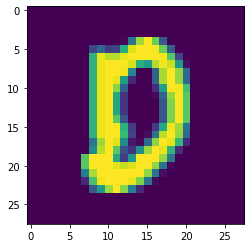

In [38]:
plt.imshow(data[i+16])

In [41]:
test_data = data[i:i+10].
model.model.predict(data[i:i+2])

ValueError: in user code:

    File "c:\Users\danendra\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\danendra\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\danendra\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\danendra\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\danendra\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\danendra\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 28, 28)


In [ ]:
mnist_data, 